[KRITIK AGARWAL 19BBTCS067](https://github.com/Kritik007)

Deep Learning Lab Experiment 3

Simple Neural Network: Write a program to implement the titanic survival prediction using simple neural network considering few test data sets

#### 1. Load packages and data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed
import tensorflow as tf

In [ ]:
!wget https://raw.githubusercontent.com/Kritik007/CODES/main/Deep-Learning-Lab/Datasets/test_clean.csv
!wget https://raw.githubusercontent.com/Kritik007/CODES/main/Deep-Learning-Lab/Datasets/train_clean.csv

--2022-11-20 18:32:33--  https://raw.githubusercontent.com/Kritik007/CODES/main/Deep-Learning-Lab/Datasets/test_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32170 (31K) [text/plain]
Saving to: ‘test_clean.csv’

test_clean.csv      100%[===================>]  31.42K  --.-KB/s    in 0s      

2022-11-20 18:32:33 (135 MB/s) - ‘test_clean.csv’ saved [32170/32170]

--2022-11-20 18:32:33--  https://raw.githubusercontent.com/Kritik007/CODES/main/Deep-Learning-Lab/Datasets/train_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 

In [ ]:
print(os.listdir("/content/"))

['.config', 'train_clean.csv', 'test_clean.csv', 'sample_data']


In [ ]:
# Load data as Pandas dataframe
train = pd.read_csv('/content/train_clean.csv', )
test = pd.read_csv('/content/test_clean.csv')
df = pd.concat([train, test], axis=0, sort=True)

In [ ]:
df.head()

,Age,Cabin,Embarked,Family_Size,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,1,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,1,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

        
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1309.0,NaN,NaN,NaN,29.562391,13.16536,0.17,22.0,30.0,35.5,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1309,3,S,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,1309.0,NaN,NaN,NaN,0.883881,1.583639,0.0,0.0,0.0,1.0,10.0
Fare,1309.0,NaN,NaN,NaN,33.276193,51.743584,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Pre-processing

###### 2.1. Encode Categorical Variables

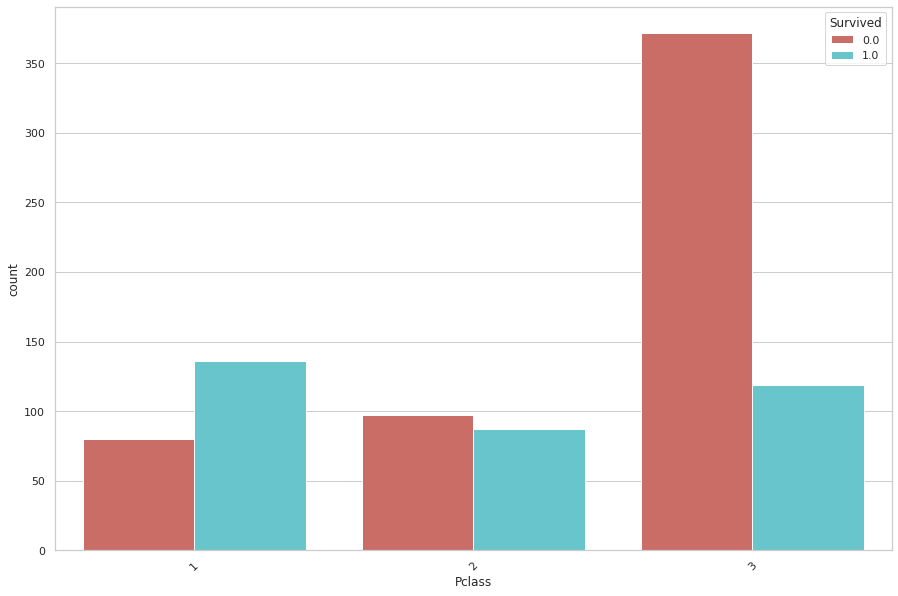

In [ ]:
sns.countplot(x='Pclass', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

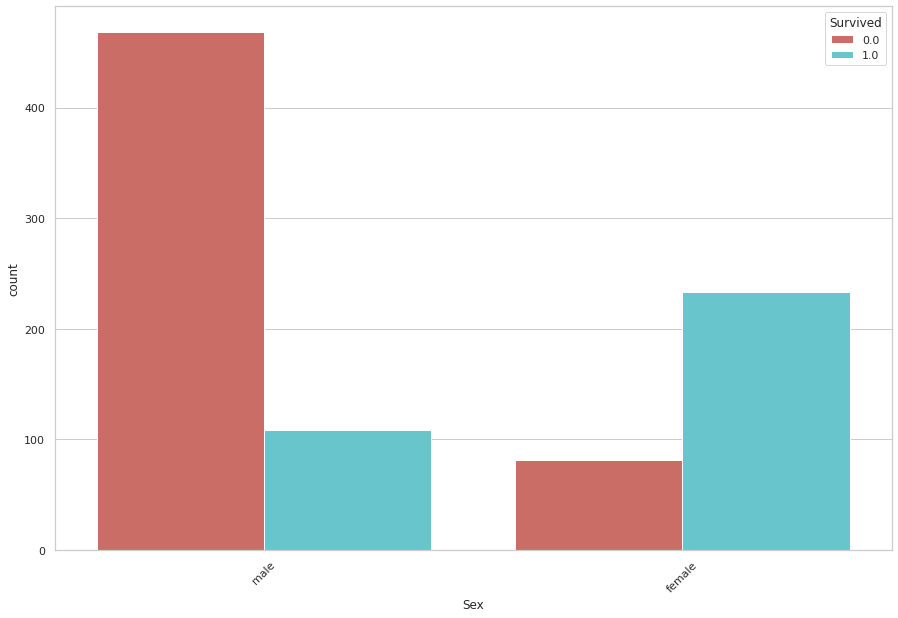

In [ ]:
sns.countplot(x='Sex', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

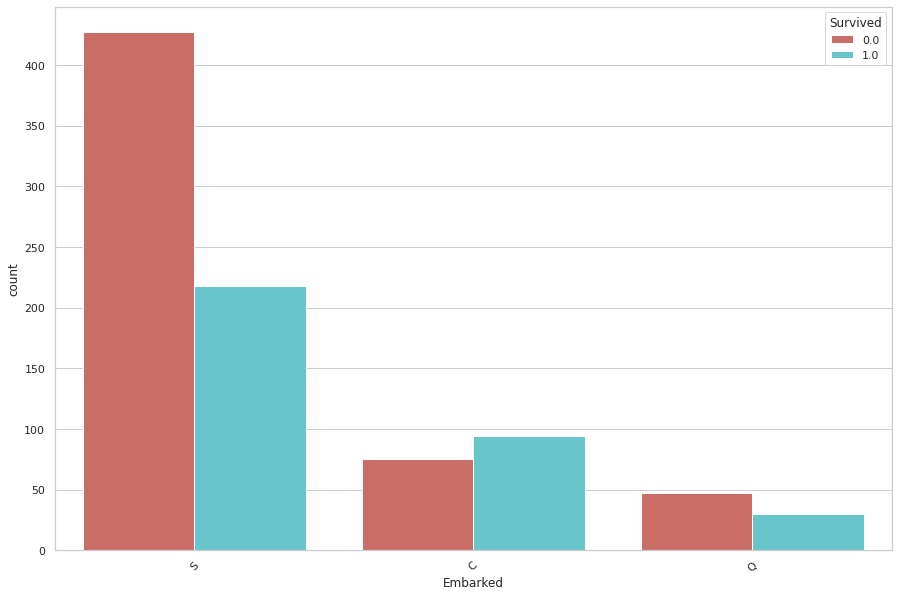

In [ ]:
sns.countplot(x='Embarked', data=df, palette='hls', hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# convert to cateogry dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes

In [ ]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked', 'Title']

for var in categorical:
    df = pd.concat([df, 
                    pd.get_dummies(df[var], prefix=var)], axis=1)
    del df[var]

In [ ]:
# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
df.head()

,Age,Family_Size,Fare,Parch,Pclass,Sex,SibSp,Survived,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rev
0,22.0,1,7.2500,0,3,1,1,0.0,0,0,1,0,0,0,1,0,0
1,38.0,1,71.2833,0,1,0,1,1.0,1,0,0,0,0,0,0,1,0
2,26.0,0,7.9250,0,3,0,0,1.0,0,0,1,0,0,1,0,0,0
3,35.0,1,53.1000,0,1,0,1,1.0,0,0,1,0,0,0,0,1,0
4,35.0,0,8.0500,0,3,1,0,0.0,0,0,1,0,0,0,1,0,0


###### 2.2. Scale Continuous Variables

In [ ]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [ ]:
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
Age,1309.0,7.327981e-17,1.000382,-2.233408,-0.574635,0.033252,0.451175,3.832549
Family_Size,1309.0,1.628440e-17,1.000382,-0.558346,-0.558346,-0.558346,0.073352,5.758637
Fare,1309.0,2.171254e-17,1.000382,-0.643344,-0.490691,-0.363894,-0.038690,9.261749
Parch,1309.0,1.730218e-17,1.000382,-0.445000,-0.445000,-0.445000,-0.445000,9.956864
Pclass,1309.0,-2.062691e-16,1.000382,-1.546098,-0.352091,0.841916,0.841916,0.841916
Sex,1309.0,6.440031e-01,0.478997,0.000000,0.000000,1.000000,1.000000,1.000000
SibSp,1309.0,-1.628440e-17,1.000382,-0.479087,-0.479087,-0.479087,0.481288,7.203909
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Embarked_C,1309.0,2.070283e-01,0.405331,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_Q,1309.0,9.396486e-02,0.291891,0.000000,0.000000,0.000000,0.000000,1.000000


#### 3. Neural Network

In [ ]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

###### 3.1. Cross-validation

Create neural network model

In [ ]:
def create_model(lyrs=[8], act='linear', opt='Adam', dr=0.0):
    
    # set random seed for reproducibility
    seed(42)
    tf.random.set_seed(42)
    
    model = Sequential()
    
    # create first hidden layer
    model.add(Dense(lyrs[0], input_dim=X_train.shape[1], activation=act))
    
    # create additional hidden layers
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    # add dropout, default is none
    model.add(Dropout(dr))
    
    # create output layer
    model.add(Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [ ]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 136       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


Train model

In [ ]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))


val_accuracy: 83.80%


Assess results

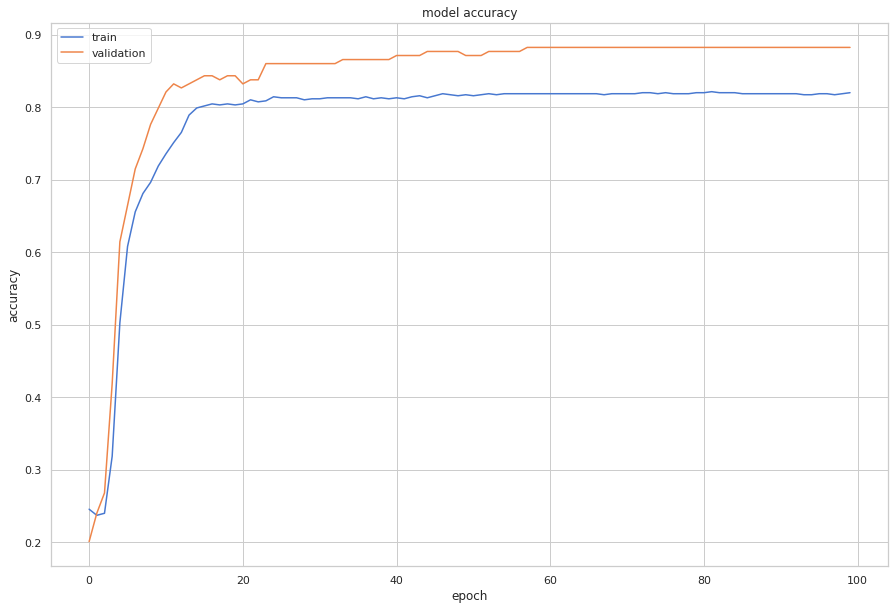

In [ ]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###### 3.2. Grid search

3.2.1. batch size and epochs

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, 
                    param_grid=param_grid,
                    cv=3,
                    verbose=2)  # include n_jobs=-1 if you are using CPU

grid_result = grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...........................batch_size=16, epochs=50; total time=   6.4s
[CV] END ...........................batch_size=16, epochs=50; total time=   7.5s
[CV] END ...........................batch_size=16, epochs=50; total time=   6.0s
[CV] END ..........................batch_size=16, epochs=100; total time=  11.0s
[CV] END ..........................batch_size=16, epochs=100; total time=   6.0s
[CV] END ..........................batch_size=16, epochs=100; total time=   5.9s
[CV] END ...........................batch_size=32, epochs=50; total time=   3.3s
[CV] END ...........................batch_size=32, epochs=50; total time=   3.3s
[CV] END ...........................batch_size=32, epochs=50; total time=   3.3s
[CV] END ..........................batch_size=32, epochs=100; total time=   5.8s
[CV] END ..........................batch_size=32, epochs=100; total time=   6.1s
[CV] END ..........................batch_size=32,

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.822671 using {'batch_size': 64, 'epochs': 100}
0.820426 (0.012992) with: {'batch_size': 16, 'epochs': 50}
0.811448 (0.018027) with: {'batch_size': 16, 'epochs': 100}
0.817059 (0.009655) with: {'batch_size': 32, 'epochs': 50}
0.815937 (0.016109) with: {'batch_size': 32, 'epochs': 100}
0.810325 (0.011446) with: {'batch_size': 64, 'epochs': 50}
0.822671 (0.014108) with: {'batch_size': 64, 'epochs': 100}


3.2.2. Optimization Algorithm

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(opt=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


[CV] END ............................................opt=SGD; total time=   3.2s
[CV] END ............................................opt=SGD; total time=   2.2s
[CV] END ............................................opt=SGD; total time=   2.3s
[CV] END ............................................opt=SGD; total time=   5.8s
[CV] END ............................................opt=SGD; total time=   3.2s
[CV] END ........................................opt=RMSprop; total time=   2.8s
[CV] END ........................................opt=RMSprop; total time=   2.5s
[CV] END ........................................opt=RMSprop; total time=   3.4s
[CV] END ........................................opt=RMSprop; total time=   2.5s
[CV] END ........................................opt=RMSprop; total time=   3.4s
[CV] END ........................................opt=Adagrad; total time=   3.2s
[CV] END ........................................opt=Adagrad; total time=   3.2s
[CV] END ...................

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828272 using {'opt': 'RMSprop'}
0.800226 (0.028764) with: {'opt': 'SGD'}
0.828272 (0.031152) with: {'opt': 'RMSprop'}
0.255935 (0.025881) with: {'opt': 'Adagrad'}
0.250317 (0.025582) with: {'opt': 'Adadelta'}
0.828272 (0.031152) with: {'opt': 'Adam'}
0.827148 (0.032312) with: {'opt': 'Nadam'}


3.2.3. Hidden neurons

In [ ]:
seed(42)
tf.random.set_seed(42)

# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(lyrs=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


[CV] END ...........................................lyrs=[8]; total time=   3.7s
[CV] END ...........................................lyrs=[8]; total time=   3.3s
[CV] END ...........................................lyrs=[8]; total time=   2.4s
[CV] END ...........................................lyrs=[8]; total time=   2.8s
[CV] END ...........................................lyrs=[8]; total time=   2.4s
[CV] END ..........................................lyrs=[10]; total time=   3.3s
[CV] END ..........................................lyrs=[10]; total time=   2.3s
[CV] END ..........................................lyrs=[10]; total time=   2.4s
[CV] END ..........................................lyrs=[10]; total time=   3.3s
[CV] END ..........................................lyrs=[10]; total time=   3.3s
[CV] END .......................................lyrs=[10, 5]; total time=   2.6s
[CV] END .......................................lyrs=[10, 5]; total time=   3.3s
[CV] END ...................

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828272 using {'lyrs': [8]}
0.828272 (0.031152) with: {'lyrs': [8]}
0.824920 (0.033945) with: {'lyrs': [10]}
0.826037 (0.033897) with: {'lyrs': [10, 5]}
0.826037 (0.033897) with: {'lyrs': [12, 6]}
0.826037 (0.032953) with: {'lyrs': [12, 8, 4]}


3.2.4. Dropout

In [ ]:
# create model
model = KerasClassifier(build_fn=create_model, 
                        epochs=50, batch_size=32, verbose=0)

# define the grid search parameters
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dr=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


[CV] END .............................................dr=0.0; total time=   4.7s
[CV] END .............................................dr=0.0; total time=   7.4s
[CV] END .............................................dr=0.0; total time=   4.0s
[CV] END .............................................dr=0.0; total time=   2.5s
[CV] END .............................................dr=0.0; total time=   2.4s
[CV] END ............................................dr=0.01; total time=   2.5s
[CV] END ............................................dr=0.01; total time=   3.3s
[CV] END ............................................dr=0.01; total time=   3.6s
[CV] END ............................................dr=0.01; total time=   5.2s
[CV] END ............................................dr=0.01; total time=   3.9s
[CV] END ............................................dr=0.05; total time=   2.4s
[CV] END ............................................dr=0.05; total time=   2.4s
[CV] END ...................

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.829396 using {'dr': 0.01}
0.828272 (0.031152) with: {'dr': 0.0}
0.829396 (0.030115) with: {'dr': 0.01}
0.827155 (0.030883) with: {'dr': 0.05}
0.823790 (0.026750) with: {'dr': 0.1}
0.820426 (0.027754) with: {'dr': 0.2}
0.817061 (0.025755) with: {'dr': 0.5}


In [ ]:
# create final model
model = create_model(lyrs=[8], dr=0.2)

print(model.summary())

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_236 (Dense)           (None, 8)                 136       
                                                                 
 dropout_108 (Dropout)       (None, 8)                 0         
                                                                 
 dense_237 (Dense)           (None, 1)                 9         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=50, batch_size=32, 
                     validation_split=0.2, verbose=0)

# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

28/28 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8238

accuracy: 82.38%


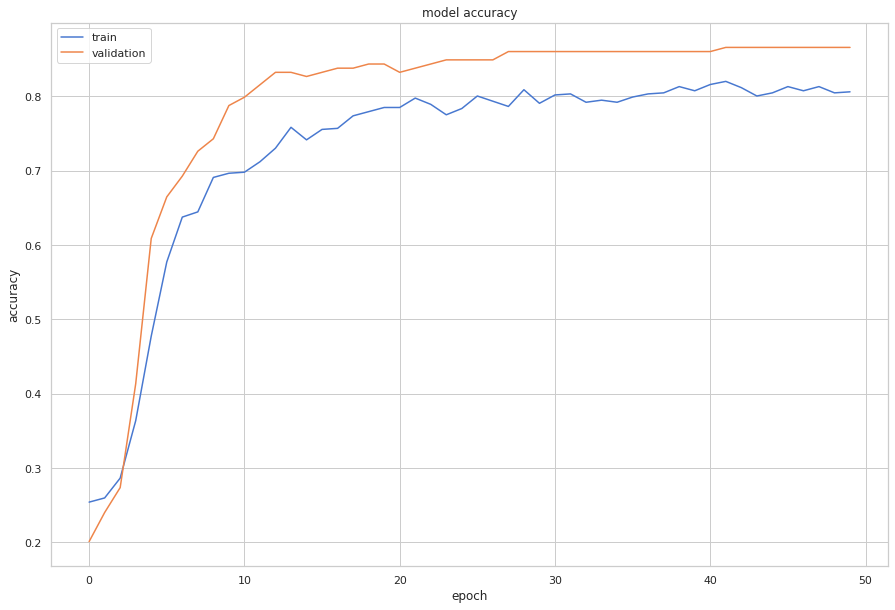

In [ ]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###### 3.3. Make Predictions on Test Set

In [ ]:
# calculate predictions
test['Survived'] = model.predict(X_test)
test['Survived'] = test['Survived'].apply(lambda x: round(x,0)).astype('int')
solution = test[['PassengerId', 'Survived']]

14/14 [==============================] - 0s 2ms/step


In [ ]:
solution.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


###### 3.4. Output Final Predictions

In [ ]:
solution.to_csv("/content/Neural_Network_Solution.csv", index=False)
print("Done! 19BBTCS067 Kritik Agarwal.")

Done! 19BBTCS067 Kritik Agarwal.


In [ ]:
out = pd.read_csv("/content/Neural_Network_Solution.csv")
out.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
